Stroke Prediction Project 

Explaratory Data Analysis(EDA)

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.express as px
import plotly.figure_factory as ff

from scipy.stats import skew

In [2]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
#Let's drop the "id" colomun
data1 = data.drop('id',axis=1)

In [ ]:
data1.head()

In [ ]:
#see how many columns and rows we have on our dataset
data1.shape

We have 5110 instances, 10 features and one output variable(label).

In [ ]:
#looking for duplicate rows
data1.duplicated().sum()

We do not have any duplicate rows

In [ ]:
#let's get some info about our data
data1.info()

- We have both numerical and categorical features.
- hypertension and heart_disease are bolian varibales: 1 means positive and 0 means negative.
- gender, work_type, residense_type and smoking_statues are categorical features, which we need to encode as nummerical. 
- bmi(body mass index) has some missing values that we should deal with after. 
- Finally, our target variable 'stroke' is numerical(boolian), 1 means positive cases and 0 means negative.

Problem goal: predict the target variable stroke. 
We have binary classification. Therefore, in order to classifie the stroke varibale, we need to build a binary classification model to get the best prediction.

In [ ]:
#number of patients who have and have not stroke
print(data1['stroke'].value_counts())

In [ ]:
#percentage of patients who have and have not stroke
print((data1['stroke'].value_counts()/data1['stroke'].count())*100)

0    95.127202
1     4.872798
Name: stroke, dtype: float64


As we can see, we have 95,13% of the patients do not has stroke and 4,87% do have stroke. Therefore, the data is inbalanced. 

In [ ]:
fig1 = px.histogram(data1,x="stroke",title='stroke_count',width=500,height=600)
fig1.show()

We can cleary see that we have imbalanced data. The porportion of the Minority class(patients having stroke) is 4,8%. It is a moderate degree of imbalance. Why would this be problematic?

With few positives relative to negative, the training model will spend more time on negative instances than positives. Thus, the model will not learn enough about positives. 

# Dealing with missing values 

In [ ]:
data1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

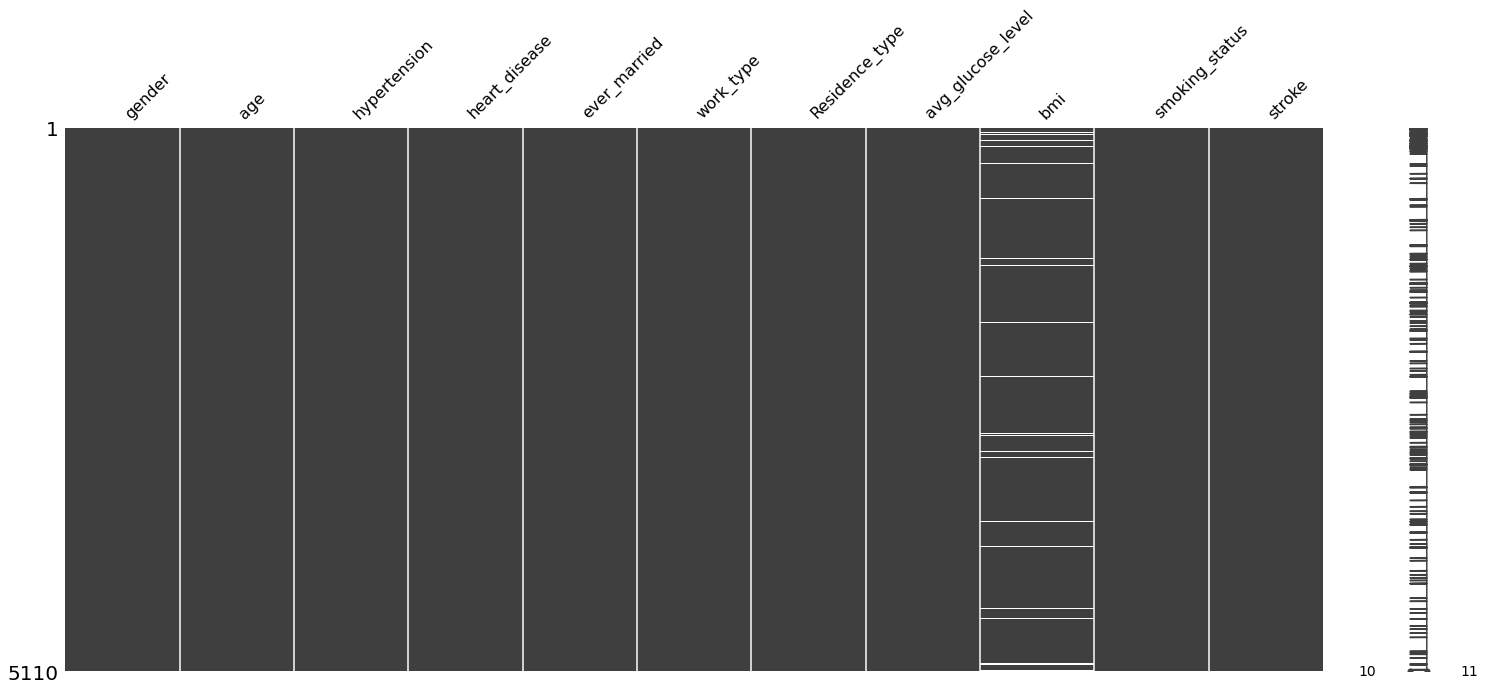

In [ ]:
import missingno as msno
msno.matrix(data1)

We have a random missing values. We will handle it by using pipeline during the model 

# What Evaluations Metrics should we use?

We can divide evaluation metrics into three groups: 

1.   Threshold Metrics(Accuracy, Precision, Recall, F-measure)
2.   Ranking Metrics (ROC and AUC)
3.   Probability Metrics (root-mean-squared error)

In this case, we are dealing with inbalanced data. So, using the Accuracy as an evaluation metric is a big mistake. 

The best metric to use in this case is the Area Under the ROC curve. 



# Let's look close to the Features

In [ ]:
numerical_features = ['age','avg_glucose_level','bmi']
categorical_features= ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

***Numerical Features***

In [ ]:
data1[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
median_numerical = data1[numerical_features].median()
mean_numerical = data1[numerical_features].mean()
mode_numerical = data1[numerical_features].mode()
median_numerical.sr = pd.Series(data=median_numerical)
mean_numerical.sr = pd.Series(data=mean_numerical)

In [ ]:
median_mean = pd.concat([mean_numerical.sr,median_numerical.sr],axis=1,keys=['mean','median'])

In [ ]:
median_mean

,mean,median
age,43.226614,45.000
avg_glucose_level,106.147677,91.885
bmi,28.893237,28.100


In [ ]:
data1[numerical_features].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

based on the median_mean DataFrame, we can expect:

- Slightly left skew on the 'age' (mean: 43.22 and median: 45)

- Slightly right skew on the 'bmi' (mean: 28.89 and median: 28.10)

- Right skew distribution on the 'avg_glucose_level' (mean: 106.14 and median: 91.88)



In [ ]:
#lets visualize numerical features histogram
group_labels = ['age','avg_glucose_level','bmi']
colors = ['#393E46', '#2BCDC1', '#F66095']
age_ar = np.array((data1['age']))
avg_glu_arr = np.array((data1['avg_glucose_level']))
bim_arr = np.array(pd.Series(data1['bmi']).dropna())
fig = ff.create_distplot([age_ar,avg_glu_arr,bim_arr],group_labels,bin_size=2.4,colors=colors, curve_type='normal')
# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()


Categorical features

Gender

In [ ]:
print(round(data1['gender'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='gender',title='gender',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.show()

Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64


hypertension

In [ ]:
print(round(data1['hypertension'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='hypertension',title='hypertension',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.show()

0    90.25
1     9.75
Name: hypertension, dtype: float64


10% of the patients have hypertension

**Heart_disease**

In [ ]:
print(round(data1['heart_disease'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='heart_disease',title='heart_disease',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.show()

0    94.6
1     5.4
Name: heart_disease, dtype: float64


5.5% of the patients have heart disease

Married or not 

In [ ]:
print(round(data1['ever_married'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='ever_married',title='ever_married',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.show()

Yes    65.62
No     34.38
Name: ever_married, dtype: float64


66% of the patient were married and 34% were not married

Profesion - Work type

In [ ]:
print(round(data1['work_type'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='work_type',title='work_type',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


Smoking status

In [ ]:
print(round(data1['smoking_status'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='smoking_status',title='smoking_status',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


Resident type

In [ ]:
print(round(data1['Residence_type'].value_counts(normalize=True)*100,2))
fig = px.histogram(data1,x='Residence_type',title='Residence_type',width=500,height=500,color_discrete_sequence=['#F66095'])
fig.show()

Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64


50% of peple live in the urban area, likewise for the rural area
 

# Let's do some bivariate analysis 

gender and stroke

In [ ]:
print(f'A female has a {round(data1[data1["gender"]=="Female"]["stroke"].mean()*100,2)}% probability of getting a stroke')
print(f'A male has a {round(data1[data1["gender"]=="Male"]["stroke"].mean()*100,2)}% probability of getting a stroke')
print(f'An other gender has a {round(data1[data1["gender"]=="Other"]["stroke"].mean()*100,2)}% probability of getting a stroke')

A female has a 4.71% probability of getting a stroke
A male has a 5.11% probability of getting a stroke
An other gender has a 0.0% probability of getting a stroke


In [ ]:
fig = px.histogram(data1,x="gender",color="gender", pattern_shape="stroke")
fig.show()

Females are more likely to get stroke than males, but the diffrence is very small.

Hypertension and stroke

In [ ]:
print(f'A person with hypertension has a  {round(data1[data1["hypertension"]==1]["stroke"].mean()*100,2)}% probability of getting a stroke')
print(f'A person with no hypertension has a  {round(data1[data1["hypertension"]==0]["stroke"].mean()*100,2)}% probability of getting a stroke')

A person with hypertension has a  13.25% probability of getting a stroke
A person with no hypertension has a  3.97% probability of getting a stroke


In [ ]:
fig = px.histogram(data1,x="hypertension",color="hypertension", pattern_shape="stroke")
fig.show()

People with hypertension are 3.3 time more likely to get stroke that people who don't have it. 